# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import data to work with arrays
import numpy as np

In [2]:
# import library to work with dataframes
import pandas as pd

In [3]:
# import library to handle maps
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
# use read_csv() method to import data

# remember to pass the file path as a strin

file_path = 'Temp_States.csv'

In [5]:
temp = pd.read_csv(file_path)

#### Print `temp`

In [32]:
# check if the data were correctly imported
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
# we can use the dtypes or info() to explore data types
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [8]:
# info() provides information about the data types, number of non-null values and the memory usage
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
City           7 non-null object
State          7 non-null object
Temperature    7 non-null float64
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


#### Select the rows where state is New York

In [9]:
# In order to select the rows with 'New York', let's start by creating a boolean mask
ny_mask = temp.State == 'New York'

In [10]:
# note that the boolean mask returns a serie with 'True' and 'False' values
# True means the row has the 'New York' value we're searching form
# False means the row has not 'New York' value
ny_mask

0     True
1     True
2     True
3    False
4    False
5    False
6    False
Name: State, dtype: bool

In [11]:
temp[ny_mask]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


In [12]:
# passing the boolean mask to filter the 'True' values
ny_temp = temp[ny_mask]

In [13]:
# the new dataset only returns cities from 'New York'
ny_temp[['City', 'State']]

,City,State
0,NYC,New York
1,Albany,New York
2,Buffalo,New York


In [14]:
temp[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


In [15]:
temp.query('State == "New York"')

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [16]:
# calling the mean() function on the ny_temp dataset
ny_temp.mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
# let's create a filter in which the values from column Temperature are abore 15 using a boolean mask
temperature_mask = temp.Temperature > 15

In [19]:
# the boolean mask will return 'True' if the temperature meet the criteria (above 15 degress celsius)
# and 'False' if the temperature is not
temperature_mask

0     True
1    False
2    False
3     True
4    False
5     True
6     True
Name: Temperature, dtype: bool

In [20]:
temp_15_celsius = temp[temperature_mask]

In [21]:
temp_15_celsius

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [22]:
# after creating a dataframe with cities with temperature above 15, let's select the 'City' column
temp_15_celsius['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

In [23]:
# we can also select the column with the '.' notation
temp_15_celsius.City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [24]:
# now let's use the bitwise operators to select two criteria
# note that each operation should withing parentheses
temp15_city_mask = (temp.Temperature > 15) & (temp.Temperature < 20)

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [25]:
# passing the boolean mask to slide the dataset
temp[temp15_city_mask]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


In [35]:
print(temp.groupby("State").mean())
print(temp.groupby("State").std())


,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


In [36]:
temp.groupby("State").describe()

Temperature                                                        \
                  count       mean       std        min        25%        50%   
State                                                                           
Connecticut         2.0  15.833333  1.964186  14.444444  15.138889  15.833333   
New Jersey          2.0  21.111111  1.571348  20.000000  20.555556  21.111111   
New York            3.0  10.740741  8.133404   3.333333   6.388889   9.444444   

                                   
                   75%        max  
State                              
Connecticut  16.527778  17.222222  
New Jersey   21.666667  22.222222  
New York     14.444444  19.444444

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [37]:
# Define the data's path
employee_path = 'employee.csv'

In [38]:
# Let's use read_csv() again! -- 
# As much as we pratice we're gonna learn it

employee = pd.read_csv(employee_path)

In [39]:
# check if the data were correctly imported
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [40]:
# check the data shape
employee.shape

(9, 7)

#### Explore the data types of the employee dataframe. Comment your results

In [41]:
# we can use the atribute dtypes to explore data's type
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [42]:
# we can also use info()
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Name          9 non-null object
Department    9 non-null object
Education     9 non-null object
Gender        9 non-null object
Title         9 non-null object
Years         9 non-null int64
Salary        9 non-null int64
dtypes: int64(2), object(5)
memory usage: 584.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

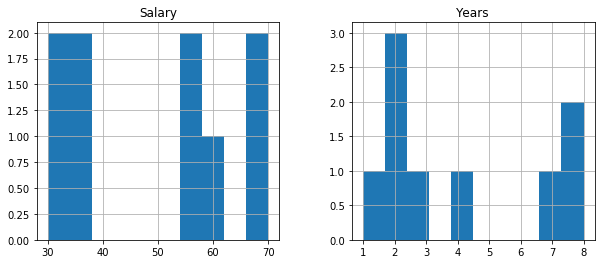

In [43]:
# as we plotted the whole dataset, the plot columns will be mixed at the same chart
employee.hist(figsize=(10,4))
plt.show()


#### What's the average salary in this company?

In [32]:
# use the mean() function to calculate the average
employee['Salary'].mean()

48.888888888888886

In [33]:
# it is a good practice to compare the mean with the median
employee['Salary'].median()

55.0

#### What's the highest salary?

In [34]:
# using the function max() to return the highest value from 'Salary' function
employee['Salary'].max()

70

#### What's the lowest salary?

In [35]:
# use the function min() to return the lowest value from 'Salary' column
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [36]:
# Method 1:
employee[employee['Salary'] ==  employee['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [37]:
# Method 1: we can use the boolean mask to retrive information about 'David'
employee[employee['Name'] == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


In [38]:
# Method 2: Or we can use .loc[] passing its index number
employee.loc[
    # index number associated to David
    2
]

Name            David
Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: 2, dtype: object

#### Could you give only David's salary?

In [39]:
# Method 1: use a boolean mask over the employee['Salary'] serie
employee['Salary'][employee.Name == 'David']

2    30
Name: Salary, dtype: int64

In [40]:
# Method 2: use iloc[]
employee.iloc[
    # select range of rows
    2:3
    :
    # select range of columns
    ,6
]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [41]:
# Using a boolean mask to filter the results
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [42]:
# Method 1: using the method head() passing '3' as an paramether
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [43]:
# Method 2: using iloc and selecting the rows from 0 to 3
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [44]:
# Method 3: using loc and selecting the rows from 0 to 3
employee.loc[0:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [45]:
# Method 4: slice
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [46]:
# double filters to create a boolean mask using bitwise operators
assoc_55_mask = (employee.Title == 'associate') & (employee.Salary > 55)

In [47]:
assoc_55_mask

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
dtype: bool

In [48]:
# slice the datase with the boolean mask
employee[assoc_55_mask]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [49]:
# groupby() function is an easy way to group columns by their categories
group_year = employee.groupby('Years')

In [50]:
# note that the groupby() function returns a proper object
group_year

In [51]:
# after creating the new object, let's call the mean() function on it
group_year.mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


In [52]:
# let's also analyse the median. As far as we know, the mean is highly influenced by outlier values
group_year.median()

,Salary
Years,
1,35
2,30
3,55
4,35
7,60
8,70


In [53]:
# and the number of elements from each group
group_year.size()

Years
1    1
2    3
3    1
4    1
7    1
8    2
dtype: int64

####  What is the average Salary per title?

In [54]:
# create a new groupby() object in order to aggregate information from 'Salary' column
group_salary = employee.groupby('Salary')

In [57]:
group_salary

In [58]:
# returns the 'Salary' mean
group_salary.mean()

,Years
Salary,
30,2.0
35,2.5
55,2.5
60,7.0
70,8.0


In [59]:
# we can also use describe() to analyse the mean, the standard deviation, the quartiles and the median (50%) 
group_salary.describe()

Years                                          
       count mean       std  min   25%  50%   75%  max
Salary                                                
30       2.0  2.0  0.000000  2.0  2.00  2.0  2.00  2.0
35       2.0  2.5  2.121320  1.0  1.75  2.5  3.25  4.0
55       2.0  2.5  0.707107  2.0  2.25  2.5  2.75  3.0
60       1.0  7.0       NaN  7.0  7.00  7.0  7.00  7.0
70       2.0  8.0  0.000000  8.0  8.00  8.0  8.00  8.0

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
* In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

#### Remember that:
- Percentiles go from 0 to 100
- Quartiles go from 1 to 4 (or 0 to 4)

#####  A quartile divides a sorted dataset into 4 equal parts:
- 0 quartile = 0 quantile = 0 percentile
- 1 quartile = 0.25 quantile = 25 percentile
- 2 quartile = .5 quantile = 50 percentile __(median)__
- 3 quartile = .75 quantile = 75 percentile
- 4 quartile = 1 quantile = 100 percentile

![title](http://deepdatamart.com/wp-content/uploads/2017/08/Interquartile.png)
[Source](http://deepdatamart.com/statistics-data-science-machine-learning/)

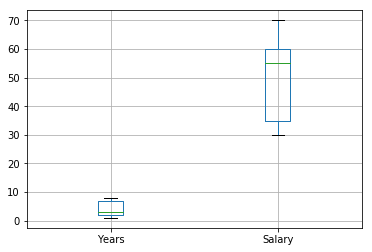

In [60]:
# If we call the boxplot() on a dataset, it will return the charts from every numerical column at the same spce
employee.boxplot()

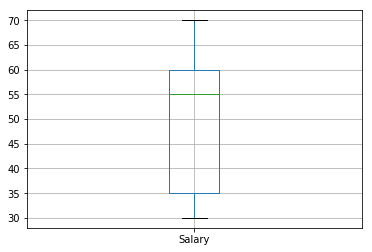

In [61]:
# we can also define the column we want to focus on
employee.boxplot(column='Salary')

In [62]:
# Define the list of quantiles
quantiles = [.1, .25, .5, .75]

In [63]:
quantiles

[0.1, 0.25, 0.5, 0.75]

In [64]:
# passing the quantiles' list into the 
employee.quantile(quantiles)

,Years,Salary
0.10,1.8,30.0
0.25,2.0,35.0
0.50,3.0,55.0
0.75,7.0,60.0


In [65]:
employee.quantile(quantiles[3])

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [66]:
# create a groupby() object passing 'Gender' and 'Salary' as an argument
group_gender = employee.groupby('Gender')

In [67]:
# calling mean() on the groupby object
group_gender.mean()['Salary']

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [68]:
# create an groupby() object to group the column 'Department'
group_department = employee.groupby('Department')

In [69]:
group_department.describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [70]:
# Aggregate data by 'Department' using groupby()
emp_group = employee.groupby('Department')

In [71]:
# Method 1: subtract metrics after grouping by 'Department'
dep_min = emp_group['Salary'].min()
dep_max = emp_group['Salary'].max()

In [72]:
dep_max-dep_min

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

In [73]:
# Method 2: using apply and lambda function
emp_group.apply(
    lambda x: x['Salary'].max() - x['Salary'].min())

Department
HR       40
IT       40
Sales     0
dtype: int64

In [74]:
# Method 2: using apply and lambda function
emp_group.agg({'Salary' : lambda x: x.max() - x.min()})

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [75]:
! pip install zipfile

  ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [76]:
# import lib to extract zipped files
from zipfile import ZipFile

In [77]:
# unzip and extract csv file
with ZipFile('Orders.zip', 'r') as zipObj:
    zipObj.extractall()

In [44]:
# define file path
path_orders = 'Orders.csv'

In [45]:
# import data using read_csv()
orders = pd.read_csv(path_orders)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [46]:
# check the data head
orders.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [81]:
# check data type and not-null values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
Unnamed: 0      397924 non-null int64
InvoiceNo       397924 non-null int64
StockCode       397924 non-null object
year            397924 non-null int64
month           397924 non-null int64
day             397924 non-null int64
hour            397924 non-null int64
Description     397924 non-null object
Quantity        397924 non-null int64
InvoiceDate     397924 non-null object
UnitPrice       397924 non-null float64
CustomerID      397924 non-null int64
Country         397924 non-null object
amount_spent    397924 non-null float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [82]:
# describe numeric data
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [83]:
# checking mean, median, min, max and standard deviation metrics from 'UnitPrice' column
orders['amount_spent'].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: amount_spent, dtype: float64

In [84]:
# calling mean() function
orders['amount_spent'].mean()

22.394748504739596

In [85]:
# as a good practice, also check the median
orders['amount_spent'].median()

11.8

#### What were the highest and lowest purchase prices? 

In [86]:
# check highest values
orders['amount_spent'].max()

168469.6

In [87]:
# check lowest values
orders['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [88]:
orders.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [89]:
# filter data using bitwise operators
spain_orders = orders[orders.Country == 'Spain']

In [90]:
spain_orders.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [91]:
# Method 1: summing the size of grouped 'CustomerID'
len(spain_orders.groupby('CustomerID').size())

30

In [92]:
# Method 1.2: summing the size of grouped 'CustomerID'
spain_orders.groupby('CustomerID').size().shape[0]

30

In [93]:
# Method 2: length of unique customers using unique()
len(spain_orders.CustomerID.unique())

30

In [94]:
# Method 2.2: length of unique customers using unique()
spain_orders.CustomerID.unique().shape[0]

30

#### Select all the customers who have bought more than 50 items ?

In [95]:
# filter quantity, select the 'CustomerID' column and than count with value_counts()
spain_orders[spain_orders['Quantity'] > 50]['CustomerID'].value_counts()

12557    24
12507     5
12454     4
12597     3
12596     1
12484     1
12546     1
Name: CustomerID, dtype: int64

#### Select orders from Spain that are above 50 items

In [96]:
# select all orders with more than 50 items
spain_orders[spain_orders['Quantity'] > 50].head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5


In [97]:
orders[(orders.Country == 'Spain') & (orders.Quantity >50)].head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5


#### Select all free orders

In [98]:
# select orders in which 'amount_spent' equal 0
orders[orders['amount_spent'] ==0].head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [99]:
orders[(orders['Description'].str.contains('lunch bag'))].head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.5


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [100]:
orders[(orders['Description'].str.contains('lunch bag')) & (orders['year'] ==2011)].head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5


#### Show the frequency distribution of the amount spent in Spain.

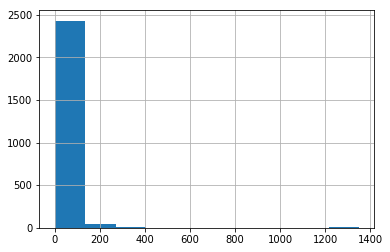

In [101]:
orders[orders.Country == 'Spain']['amount_spent'].hist()

#### Select all orders made in the month of August

In [102]:
orders[orders.month == 8].head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [103]:
# Method 1: filter months == 8 and group by country
orders[orders.month == 8].groupby('Country').size().sort_values(ascending=False)


Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
dtype: int64

In [104]:
# Method 2: filter data by month and value_counts()
orders[orders.month == 8]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [105]:
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [106]:
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [107]:
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64